In [1]:
%matplotlib inline

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import re

In [2]:
# import Json data
def readjson(filename):
    with open(filename) as file:
        data = json.load(file)
    return data

### Read train and test data.
train = readjson("train.json")
test = readjson("test.json")

train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)

In [3]:
print(len(train_df['request_id']))
print(len(test_df['request_id']))
print(train_df.info())
print(test_df.info())
print(pd.unique(train_df['requester_user_flair']))

4040
1631
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4040 entries, 0 to 4039
Data columns (total 32 columns):
giver_username_if_known                                 4040 non-null object
number_of_downvotes_of_request_at_retrieval             4040 non-null int64
number_of_upvotes_of_request_at_retrieval               4040 non-null int64
post_was_edited                                         4040 non-null object
request_id                                              4040 non-null object
request_number_of_comments_at_retrieval                 4040 non-null int64
request_text                                            4040 non-null object
request_text_edit_aware                                 4040 non-null object
request_title                                           4040 non-null object
requester_account_age_in_days_at_request                4040 non-null float64
requester_account_age_in_days_at_retrieval              4040 non-null float64
requester_days_since_first_post_on_ra

No null missing values in both test and train data sets except the "requester_user_flair" (Users on RAOP received badges). For this variable, a null value represents that the user has not received a badge. Hence the null values are valid.

The test data set has less info than the train data set.

In [4]:
train_df.head()

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,0,1,False,t3_l25d7,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,...,False,[],0,1,0,1,None,nickylvst,1.317853e+09,1.317849e+09
1,N/A,2,5,False,t3_rcb83,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,...,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,4258,116,11168,None,fohacidal,1.332652e+09,1.332649e+09
2,N/A,0,3,False,t3_lpu5j,0,My girlfriend decided it would be a good idea ...,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,...,False,[],0,3,0,3,None,jacquibatman7,1.319650e+09,1.319646e+09
3,N/A,0,1,True,t3_mxvj3,4,"It's cold, I'n hungry, and to be completely ho...","It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,...,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,59,76,81,None,4on_the_floor,1.322855e+09,1.322855e+09
4,N/A,6,6,False,t3_1i6486,5,hey guys:\n I love this sub. I think it's grea...,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,...,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1225,1733,1887,None,Futuredogwalker,1.373658e+09,1.373654e+09


In [5]:
train_df.describe()

,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,request_number_of_comments_at_retrieval,requester_account_age_in_days_at_request,requester_account_age_in_days_at_retrieval,requester_days_since_first_post_on_raop_at_request,requester_days_since_first_post_on_raop_at_retrieval,requester_number_of_comments_at_request,requester_number_of_comments_at_retrieval,requester_number_of_comments_in_raop_at_request,...,requester_number_of_posts_at_retrieval,requester_number_of_posts_on_raop_at_request,requester_number_of_posts_on_raop_at_retrieval,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,unix_timestamp_of_request,unix_timestamp_of_request_utc
count,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,...,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4.040000e+03,4.040000e+03,4.040000e+03,4.040000e+03
mean,2.424505,6.180446,2.871040,254.586579,757.692720,16.417034,518.993205,115.098267,289.425743,0.645050,...,41.151733,0.063614,1.239109,18.076733,1160.079950,2720.342079,3.743236e+03,7.788069e+03,1.342829e+09,1.342826e+09
std,3.023101,10.746320,4.723339,303.275730,333.035728,70.651428,267.872623,193.318968,357.416133,3.413813,...,80.798543,0.325773,0.603083,21.736465,3718.365515,6264.378878,2.583816e+04,3.916741e+04,2.333057e+07,2.332989e+07
min,0.000000,0.000000,0.000000,0.000000,45.291562,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-173.000000,-173.000000,0.000000e+00,0.000000e+00,1.297723e+09,1.297723e+09
25%,1.000000,2.000000,0.000000,3.473168,522.248455,0.000000,279.009051,0.000000,8.000000,0.000000,...,2.000000,0.000000,1.000000,1.000000,3.000000,22.000000,9.000000e+00,5.200000e+01,1.320469e+09,1.320466e+09
50%,2.000000,4.000000,1.000000,157.067170,753.270874,0.000000,528.781939,24.000000,114.000000,0.000000,...,13.000000,0.000000,1.000000,11.000000,174.500000,708.000000,3.510000e+02,1.283500e+03,1.342565e+09,1.342561e+09
75%,3.000000,7.000000,4.000000,390.092653,900.349838,0.000000,776.226670,140.250000,479.000000,0.000000,...,46.000000,0.000000,1.000000,27.000000,1163.750000,3304.000000,2.303750e+03,6.829000e+03,1.364618e+09,1.364614e+09
max,47.000000,345.000000,61.000000,2809.750787,2879.276319,785.457685,1025.407593,994.000000,1000.000000,88.000000,...,999.000000,5.000000,9.000000,186.000000,155010.000000,223708.000000,1.286864e+06,2.046482e+06,1.381552e+09,1.381523e+09


In [6]:
train_df['upvotes'] = (train_df['requester_upvotes_minus_downvotes_at_request'] + 
                       train_df['requester_upvotes_plus_downvotes_at_request'])/2
train_df['downvotes'] = train_df['requester_upvotes_plus_downvotes_at_request'] - train_df['upvotes']
train_df['title_length'] = train_df.request_title.str.len()
train_df['request_length'] = train_df.request_text.str.len()
train_df['request_edit_length'] = train_df.request_text_edit_aware.str.len()

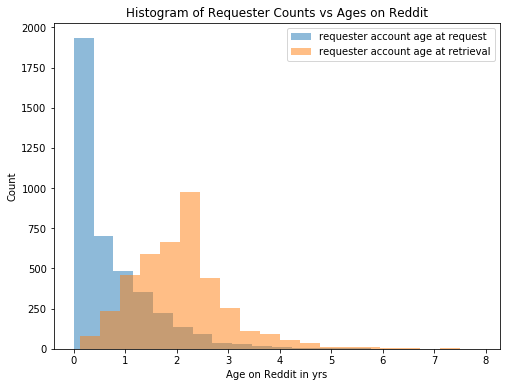

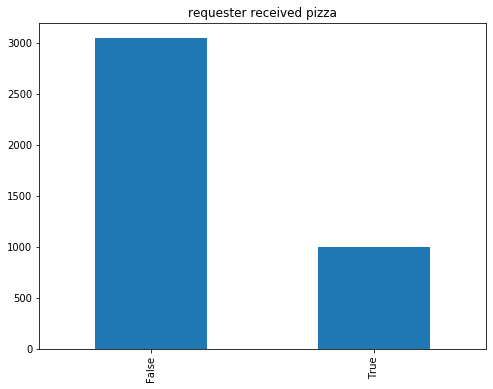

In [18]:
plt.figure(figsize=(8,6))
plt.hist(train_df['requester_account_age_in_days_at_request']/365.25, bins = 20, alpha = 0.5, 
         label = "requester account age at request" )
plt.hist(train_df['requester_account_age_in_days_at_retrieval']/365.25, bins = 20, alpha = 0.5, 
         label = "requester account age at retrieval" )
plt.xlabel("Age on Reddit in yrs")
plt.ylabel("Count")
plt.title("Histogram of Requester Counts vs Ages on Reddit")
plt.legend(loc='upper right')

plt.figure(figsize=(8,6))
train_df['requester_received_pizza'].value_counts().plot(kind='bar', title='requester received pizza')

<Figure size 432x432 with 0 Axes>

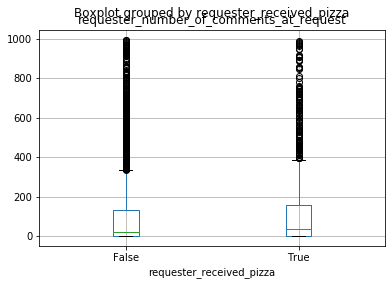

<Figure size 432x432 with 0 Axes>

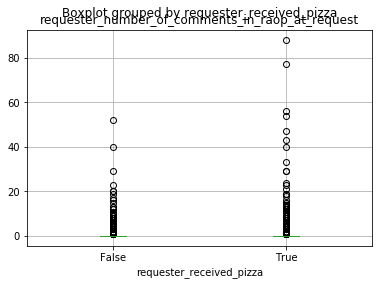

<Figure size 432x432 with 0 Axes>

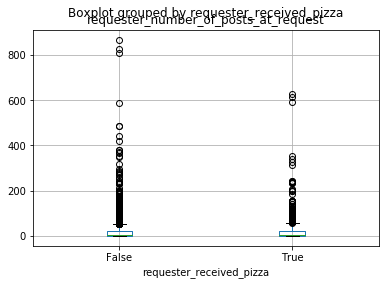

<Figure size 432x432 with 0 Axes>

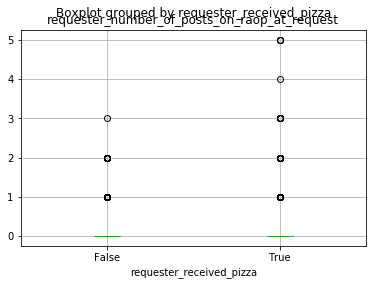

<Figure size 432x432 with 0 Axes>

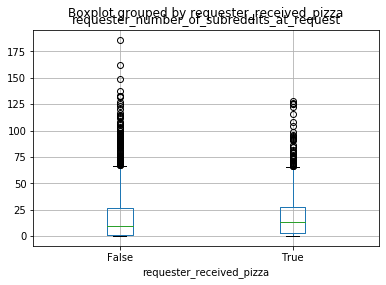

<Figure size 432x432 with 0 Axes>

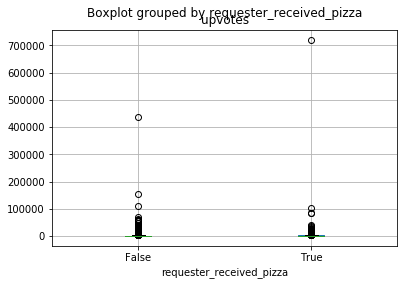

<Figure size 432x432 with 0 Axes>

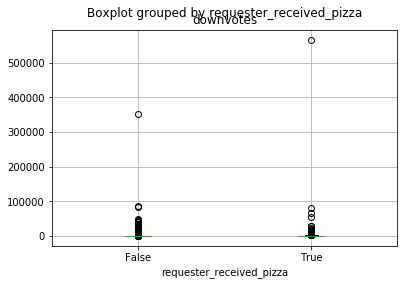

<Figure size 432x432 with 0 Axes>

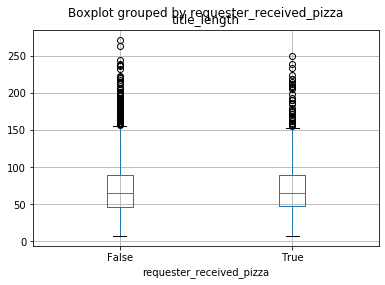

<Figure size 432x432 with 0 Axes>

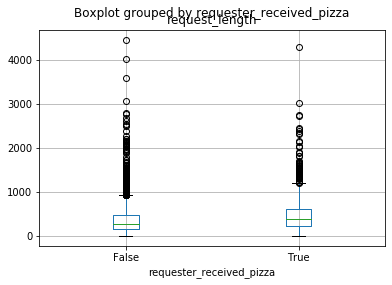

<Figure size 432x432 with 0 Axes>

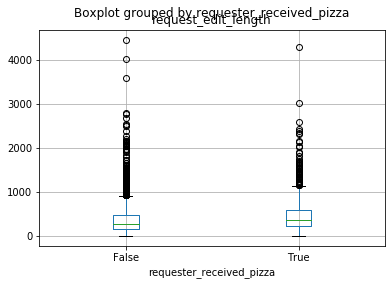

In [15]:
boxplot_df = train_df[['requester_received_pizza', 'requester_number_of_comments_at_request',
                      'requester_number_of_comments_in_raop_at_request',
                      'requester_number_of_posts_at_request', 'requester_number_of_posts_on_raop_at_request',
                      'requester_number_of_subreddits_at_request', 
                      'upvotes', 'downvotes', 'title_length', 'request_length', 'request_edit_length']]
# axes = boxplot_df.boxplot(by='requester_received_pizza', figsize=(16,16), return_type='axes')
# for ax in axes.values():
#     ax.set_ylim(ylim)
# plt.show()
#plt.figure(figsize=(16,16))
for column in boxplot_df:
    if column != 'requester_received_pizza':
        plt.figure(figsize=(6,6))
        boxplot_df.boxplot([column], by='requester_received_pizza')
        

In [9]:
for i in train_df["request_title"][700:800]:
    print(i)
for i in train_df["request_text_edit_aware"][570:580]:
    print(i) 

(REQUEST) ASKING FOR PIZZA FOR ME AND DAUGHTER.
[REQUEST] I have eaten ramen 3 meals a day for the last 5 days, can someone please be mind enough to lend a guy some pepperoni? 
[REQUEST] Sunderland, UK. Have to spend all my money repairing my bike for work, will forward on Friday when I get paid.
[Request Fl, USA] Celebrating early high school graduation.
[Request] Darwin, Australia, broke uni student, havent eaten for 3 days :(
[Request] I've never felt like anything terrible enough is happening in my life to feel like I deserve a pizza over some of the other people that request here.
[request] College guy, pretty hungry. Would love a pizza for tonight.
Request: No power/Irene
[Request] No luck so far with a job hunt. Would love something warm for dinner!
(Request) Pizza in Long Beach?
[REQUEST] in Harrisonburg VA (JMU), student pulling an all nighter for final tomorrow
[Request] Today has sucked
[Request] struggling college student with $1.58 to my name
[Request] My boyfriend's birth

In [30]:
# Request includes an image
image_count = re.compile(r'(imgur\.com|\.jpg)', re.IGNORECASE)
images = train_df['request_text_edit_aware'].apply(lambda x: len(image_count.findall(x)))
train_df['has_image'] = np.where(images > 0,1,0)
train_df['ones'] = np.ones(len(train_df['has_image']))

# Request title includes food-related words
food = re.compile(r'(pizza|lunch|food|hungry|fridge|starve|starving|meal)', re.IGNORECASE)
money = re.compile(r'(money|rent|pay|paid|broke|cash|dollar|poor|job)', re.IGNORECASE)
title_has_food = train_df['request_title'].apply(lambda x: len(food.findall(x)))
title_has_money = train_df['request_title'].apply(lambda x: len(money.findall(x)))
train_df['title_has_food'] = np.where(title_has_food > 0,1,0)
train_df['title_has_money'] = np.where(title_has_money > 0,1,0)

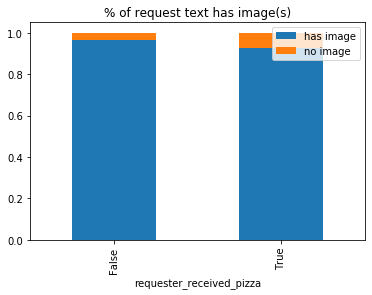

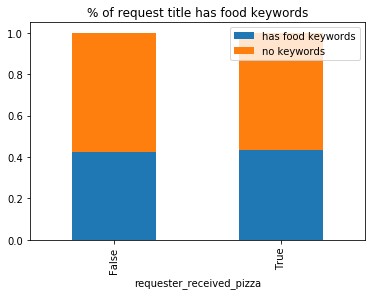

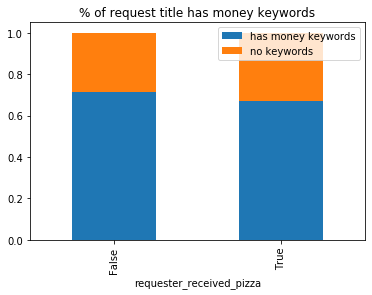

In [37]:
transform_bp_df = train_df[['requester_received_pizza', 'has_image', 'ones', 'title_has_food', 'title_has_money']]

tps = transform_bp_df.pivot_table(values=['ones'], 
                      index='requester_received_pizza',
                      columns='has_image',
                      aggfunc='count')

tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind='bar', stacked=True)
plt.title('% of request text has image(s)')
plt.legend(['has image', 'no image'], loc='upper right')
plt.show()

tps = transform_bp_df.pivot_table(values=['ones'], 
                      index='requester_received_pizza',
                      columns='title_has_food',
                      aggfunc='count')

tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind='bar', stacked=True)
plt.title('% of request title has food keywords')
plt.legend(['has food keywords', 'no keywords'], loc='upper right')
plt.show()

tps = transform_bp_df.pivot_table(values=['ones'], 
                      index='requester_received_pizza',
                      columns='title_has_money',
                      aggfunc='count')

tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind='bar', stacked=True)
plt.title('% of request title has money keywords')
plt.legend(['has money keywords', 'no keywords'], loc='upper right')
plt.show()

[0 1]
